## Stationarity Test

In [1]:
# Loading the required modules
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
co2 = sm.datasets.co2.load_pandas()
df_co2 = co2.data
print(df_co2.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [12]:
#filling na values with previous values
df_co2.fillna(df_co2.bfill(), inplace=True)

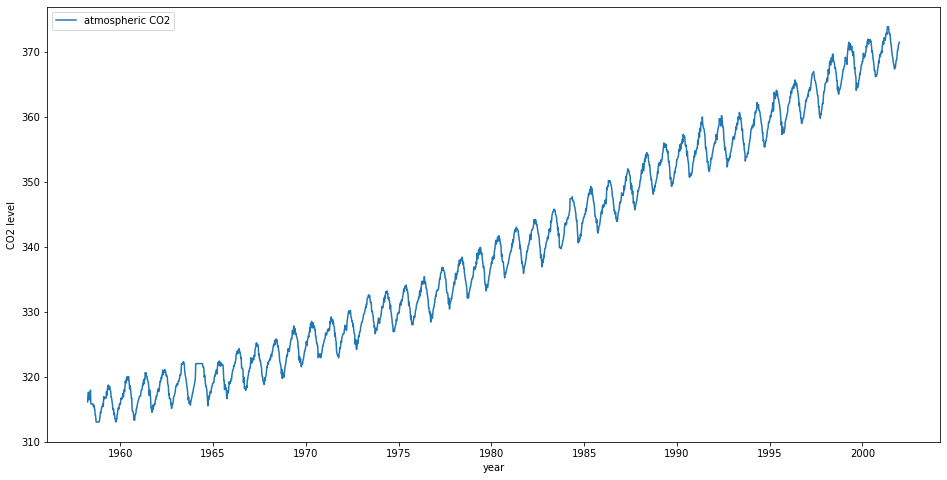

In [13]:
plt.figure(figsize = (16,8))
plt.plot(df_co2, label = 'atmospheric CO2')
plt.xlabel('year')
plt.ylabel('CO2 level')
plt.legend(loc = 'best')
plt.show()

In [33]:
# Taking the log of all values, to reduce the scale
# Checking for stationarity
df_log = np.log(df_co2['co2'])

#### stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

In [31]:
def test_stationarity(ts):
    rol_mean = ts.rolling(52).mean()
    rol_std = ts.rolling(52).std()
    plt.figure(figsize =(10, 6))
    orig = plt.plot(ts, color='blue', label = 'Data')
    mean = plt.plot(rol_mean, color = 'red', label = 'rolling mean')
    #std_dev = plt.plot(rol_std, color = 'black', label ='rolling std')
    plt.legend(loc='best')
    
    #ADFuller test
    test_res = adfuller(ts, autolag = 'AIC')
    test_out = pd.Series(test_res[0:4], index = ['Test Statistics', 'P-value', '#Lags', 'Number of observations'] )
    for key, value in test_res[4].items():
        test_out['Critical Value (%s)'%key] = value
    print(test_out)

Test Statistics             -0.122375
P-value                      0.947164
#Lags                       27.000000
Number of observations    2256.000000
Critical Value (1%)         -3.433252
Critical Value (5%)         -2.862822
Critical Value (10%)        -2.567452
dtype: float64


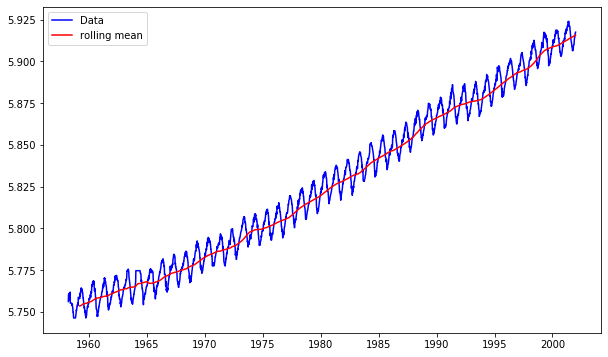

In [32]:
test_stationarity(df_log)

#### Removing Trend

Test Statistics            -19.228153
P-value                      0.000000
#Lags                       27.000000
Number of observations    2205.000000
Critical Value (1%)         -3.433319
Critical Value (5%)         -2.862852
Critical Value (10%)        -2.567468
dtype: float64


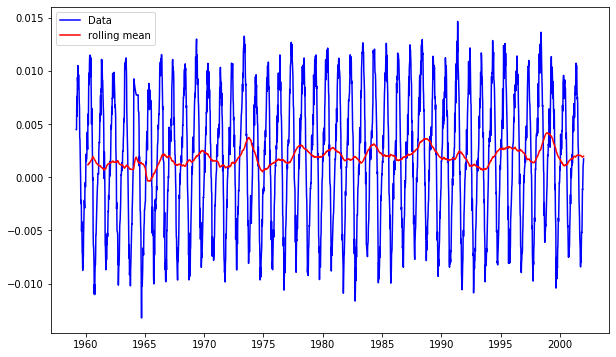

In [26]:
moving_avg = df_log.rolling(52).mean()
stationary_t = df_log - moving_avg
test_stationarity(stationary_t.dropna())

Test Statistics          -1.566072e+01
P-value                   1.555228e-28
#Lags                     2.700000e+01
Number of observations    2.255000e+03
Critical Value (1%)      -3.433253e+00
Critical Value (5%)      -2.862823e+00
Critical Value (10%)     -2.567453e+00
dtype: float64


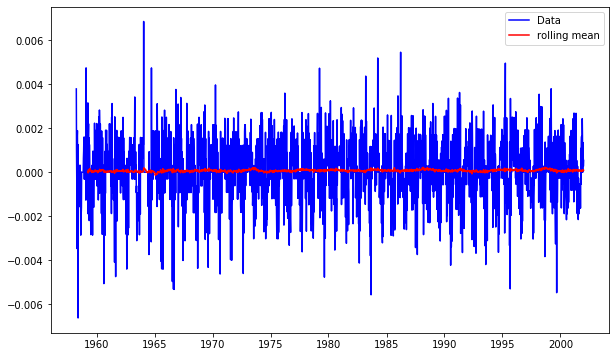

In [35]:
# making mean time independent by subtracting the lag values
df_log_diff = df_log - df_log.shift(1)
test_stationarity(df_log_diff.dropna())

C:\Users\hkpat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


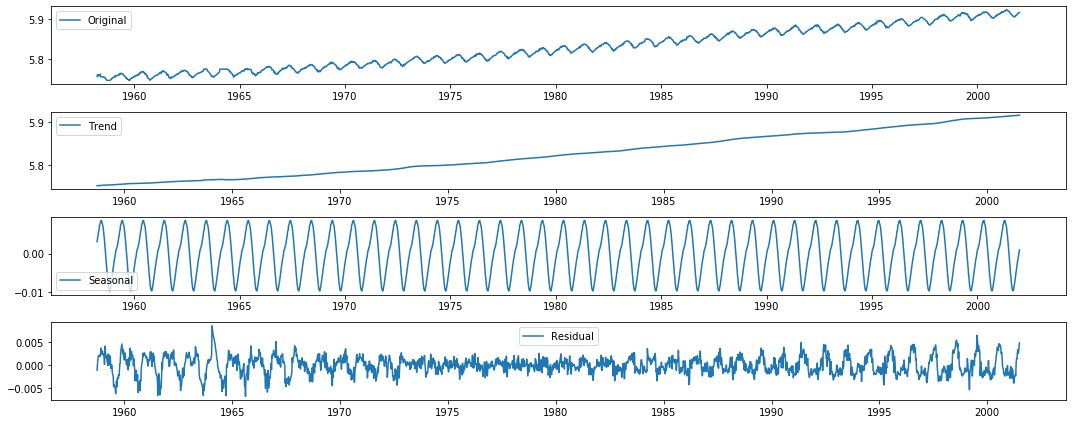

In [37]:
# Seasonal Variations
decomp = seasonal_decompose(df_log, freq = 52)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize = (15, 6))
plt.subplot(411)
plt.plot(df_log, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')


plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Test Statistics          -1.548104e+01
P-value                   2.556074e-28
#Lags                     2.700000e+01
Number of observations    2.204000e+03
Critical Value (1%)      -3.433320e+00
Critical Value (5%)      -2.862852e+00
Critical Value (10%)     -2.567469e+00
dtype: float64


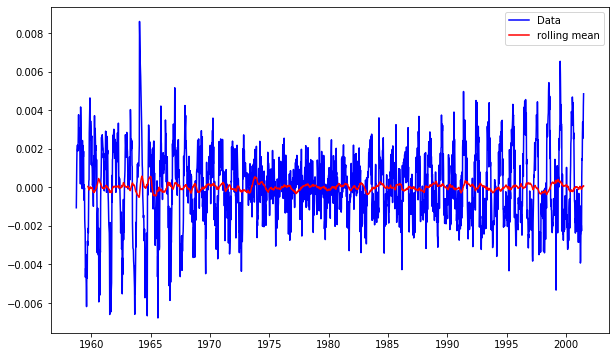

In [39]:
#Checking stationarity of residuals
t_log_decomp = pd.DataFrame(residual)
t_log_decomp['Date'] = df_log.index
t_log_decomp.dropna(inplace = True)
test_stationarity(t_log_decomp['resid'])